# Part One

### 1

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('seeds.xlsx')
# df.to_csv('seeds.csv')
df.shape

(210, 8)

### 2

In [190]:
c = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [191]:
X.columns

Index(['area', 'perimeter', 'compactness', 'kernellength', 'kernelwidth',
       'asymmetrycoefficient', 'kernelgroove'],
      dtype='object')

# Part Two

### 3

In [192]:
covariance_matrix = X.cov()

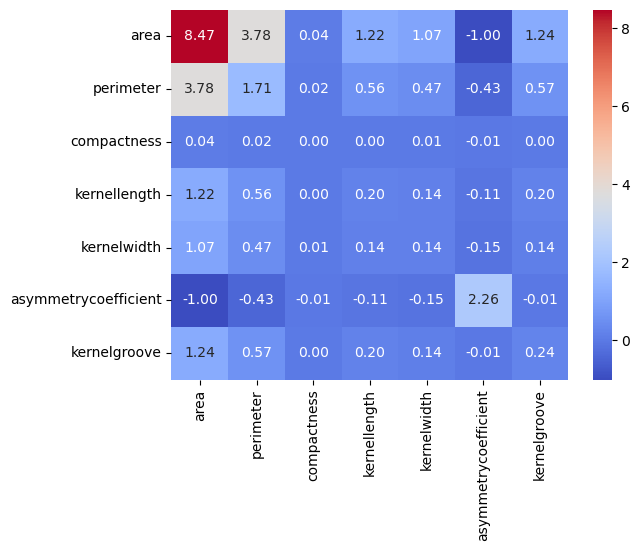

In [193]:
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f');

### 4

In [194]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [195]:
eig_vals

array([1.07933269e+01, 2.12945512e+00, 7.36300330e-02, 1.28874947e-02,
       2.74822668e-03, 1.57044980e-03, 2.96554425e-05])

In [196]:
eig_vecs

array([[-0.8842285 ,  0.10080577, -0.26453354, -0.19944949, -0.13717297,
         0.28063956, -0.02539824],
       [-0.39540542,  0.05648963,  0.28251995,  0.57881686,  0.57475603,
        -0.30155864,  0.0658399 ],
       [-0.00431132, -0.00289474, -0.05903584, -0.05776023, -0.05310454,
        -0.04522905,  0.99412565],
       [-0.12854448,  0.03062173,  0.40014946,  0.43610024, -0.78699776,
        -0.11343761,  0.00143143],
       [-0.11105914,  0.00237229, -0.31923869, -0.23416358, -0.1448029 ,
        -0.89626785, -0.0815499 ],
       [ 0.12761562,  0.98941048, -0.06429754,  0.02514736, -0.00157564,
         0.003288  ,  0.00114269],
       [-0.1289665 ,  0.08223339,  0.76193973, -0.61335659,  0.08765361,
        -0.10992364,  0.00897193]])

### 5

In [197]:
idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, idx]
eigvals = eig_vals[idx]
eigvecs = eig_vecs[:, idx]

In [198]:
W = eigvecs[:, :2]
Z = X @ W
Z

,0,1
0,-20.863299,5.185150
1,-20.515517,3.913242
2,-19.539351,5.470965
3,-19.144575,4.981281
4,-21.819850,4.419086
...,...,...
205,-17.157978,6.129345
206,-16.090788,6.711812
207,-17.699817,10.910436
208,-16.867772,6.077181


### 6

In [199]:
Z.columns = ['a', 'b']

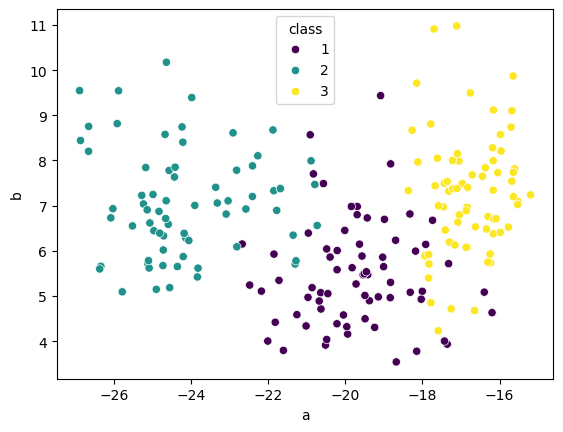

In [200]:
sns.scatterplot(data=Z, x='a', y='b', hue=c, palette='viridis');

### 7

In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Z = pca.fit_transform(X)

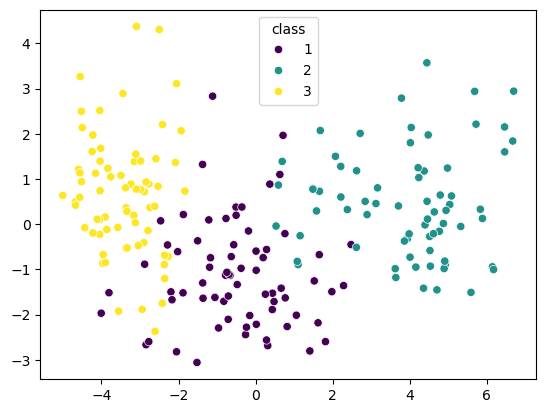

In [202]:
sns.scatterplot(x=Z[:, 0], y=Z[:, 1], hue=c, palette='viridis');

### 8

In [203]:
eigvals[:2].sum()

12.922782035961518

In [204]:
eigvals.sum()

13.01364789558829

In [205]:
e = 1 - eigvals[:2].sum() / eigvals.sum()
e

0.006982351171309631

### 9

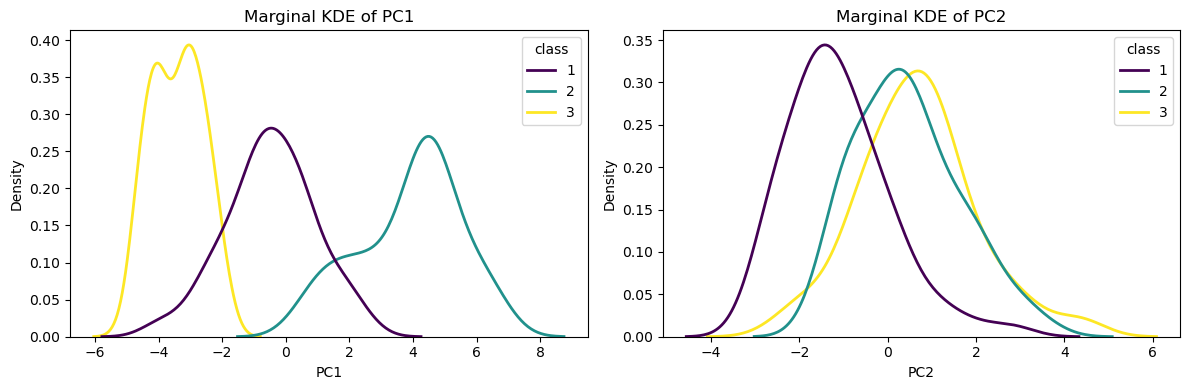

In [206]:
Z_df = pd.DataFrame({
    'PC1': Z[:, 0],
    'PC2': Z[:, 1],
    'class': c
})

# 2) پالت رنگ ثابت برای کلاس‌ها (اختیاری اما توصیه‌شده برای ثبات رنگ در کل تمرین)
# اگر کلاس‌ها 1،2،3 هستند:

# 3) دو KDE حاشیه‌ای یک‌بعدی: یکی برای PC1 و یکی برای PC2
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

sns.kdeplot(
    data=Z_df, x='PC1', hue='class', common_norm=False,
    fill=False, linewidth=2, ax=axes[0], palette='viridis'
)
axes[0].set_title('Marginal KDE of PC1')
axes[0].set_xlabel('PC1')

sns.kdeplot(
    data=Z_df, x='PC2', hue='class', common_norm=False,
    fill=False, linewidth=2, ax=axes[1], palette='viridis'
)
axes[1].set_title('Marginal KDE of PC2')
axes[1].set_xlabel('PC2')

plt.tight_layout()
plt.show()